In [218]:
import numpy as np
import copy
import math
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

In [220]:
df=pd.read_csv('test.csv')

In [222]:
x=df['x']
print(x)
      

0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
       ...   
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: x, Length: 97, dtype: float64


In [224]:
y=df['y']
print(y)

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: y, Length: 97, dtype: float64


[]

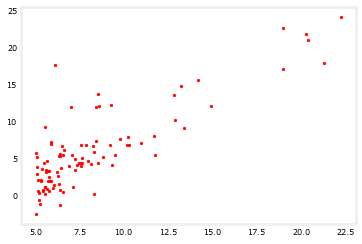

In [226]:
plt.scatter(x, y, label= "stars", color= "red", 
            marker= ".", s=30)
plt.plot()

In [228]:

#m:total no of training examples
m = len(x)
print(m)

97


In [230]:
#Predicted model
w = 1
b = -3
#   f_wb= 1 * x + 10

In [232]:
#computing output model
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

[]

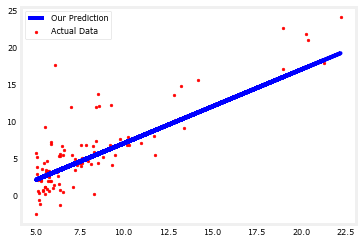

In [234]:
#     Model
f_wb = compute_model_output(x, w, b)
plt.plot(x, f_wb, c='b',label='Our Prediction')
#  Values
plt.scatter(x, y, color= "red", 
            marker= ".", s=30,label='Actual Data')
plt.legend()
plt.plot()

In [236]:
#Cost Function
def compute_cost(x, y, w, b): 
  
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [238]:
# Finding Gradient
def compute_gradient(x, y, w, b): 
   
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [240]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [242]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01
w,b,J_history,w_history = gradient_descent(x ,y, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)


Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [244]:
m = x.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x[i] + b

Our Predicted Model is 1.1930336441888891*x +(-3.8957808783048415) 


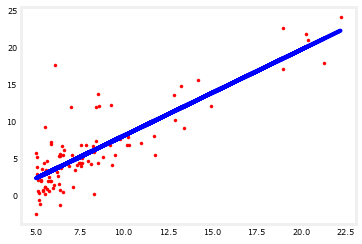

In [246]:
# Plot the linear fit
plt.plot(x, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x, y, marker='.', c='r') 

print(f"Our Predicted Model is {w}*x +({b}) ")
